<center><h3>Graduate Admission Chance Prediction</h3></center><br>
<p>For our final project, we decided to work on the grauate admission data from Kaggle.</p>
<h4>Problem Statement:</h4>
<p>Can we predict the chance of getting amitted to a graduae school for students from India?
The independent variables are:
<ul>
    <li>GRE Score</li>
    <li>TOEFL Score</li>
    <li>CGPA: a decimal number from 0-10 for the student's GPA</li>
    <li>Research: Whether or not a student has been involved in doing research</li>
    <li>LOR: The quality of submitted Letters of recommendation</li>
    <li>SOP: The quality of submiltted</li>
    <li>University Rating (0-5)</li>
</ul>
The dependent variable is a number from 0 to 1 indicating the chance of being admitted to a graaduate school</p>

<h4>Project Overview:</h4>
<ol>
<li>Studying two datastes provided by Kaggle, and comparing their contents</li>
<li>Descriptive data analysis and visualizations to understand the distribution of the data and correlations</li>
 <li>Splitting the data based on its size for performing test and training</li>
    <li>Modeling and training data with Regression Algolirithms</li>
    <li>Modeling data using Ensemble algorithms</li>
    <li>Testing</li>
    <li>Finetuning hyperparameteres<li>
    <li>Testing</li>
    <li>Redefining the problem statement based on the provided usecase and repeating the prevous steps</li>
</ol>

<h4><center>____Imports____</center></h4>

In [59]:
import os
import pandas as pd
import numpy as np 
import zipfile

import seaborn as sns
sns.set_style(style='darkgrid')
%matplotlib inline
import matplotlib.pyplot as plt

import scipy.stats as sts

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.inspection import permutation_importance
from sklearn.utils import shuffle
import pandasql as psql

from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import KFold
#from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
#from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

import catboost as cb


from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report


from sklearn.model_selection import cross_validate
from sklearn import metrics

from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

import tensorflow as tf

<h4><center>____Downloading Datasets from Kaggle____</center></h4>
<p>Link to Kaggle:</p>
<a> href="https://www.kaggle.com/mohansacharya/graduate-admissions" </a>

In [60]:
os.environ['KAGGLE_USERNAME'] = "fozoolkhan"
os.environ['KAGGLE_KEY'] = "6cdfe920289a010bf6af4742f5ce2be4"
!kaggle datasets download -d mohansacharya/graduate-admissions

graduate-admissions.zip: Skipping, found more recently modified local copy (use --force to force download)


<h4><center>____Unzipping the data____</center></h4>

In [61]:
with zipfile.ZipFile("graduate-admissions.zip","r") as zip_ref:
    zip_ref.extractall("targetdir")

<h4><center>____Reading datasets from csv files into dataframes____</center></h4>

In [62]:
cwd = os.getcwd()

file_path = cwd + '/targetdir/'

admission_ds_raw_v1_df = pd.read_csv(file_path +'Admission_Predict_Ver1.1.csv',index_col='Serial No.')
admission_ds_raw_df = pd.read_csv(file_path +'Admission_Predict.csv',index_col='Serial No.')

admission_ds_raw_df.rename(columns={'LOR ': 'LOR', 'GRE Score': 'GRE_Score', 'TOEFL Score': 'TOEFL_Score', 'University Rating': 'University_Rating', 'Serial No.': 'Serial_Num', 'Chance of Admit ': 'Chance_of_Admit'}, inplace=True)
admission_ds_raw_v1_df.rename(columns={'LOR ': 'LOR', 'GRE Score': 'GRE_Score', 'TOEFL Score': 'TOEFL_Score', 'University Rating': 'University_Rating', 'Serial No.': 'Serial_Num', 'Chance of Admit ': 'Chance_of_Admit'}, inplace=True)

<h4><center>_____Descriptive Data Analysis____</center></h4>

In [63]:
admission_ds_raw_df.describe()

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [64]:
admission_ds_raw_v1_df.describe()

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


<h4>Checking if the data has missing values</h4>
<p>The results show that there are no null or missing values in the data.</p>

In [65]:
admission_ds_raw_df.isna().sum()

GRE_Score            0
TOEFL_Score          0
University_Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance_of_Admit      0
dtype: int64

In [66]:
admission_ds_raw_v1_df.isna().sum()

GRE_Score            0
TOEFL_Score          0
University_Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance_of_Admit      0
dtype: int64

<h4>Comparing the content of the two provided CSV files</h4>
<p>The dataset comes with two csv files. We compare the content of these files together to see if we can use one as training and the other for testing. The results show that one file has 500 records and the other file has 400 records. When we compared the records using psql statments, we realized the the file with 400 records is a subset of the file with 500 records. In other words, the file with 500 records, contains the exact 400 records in the other file plus 100 additional records. Therefore, we decided to use the file with more number of records. Also, since 500 records is not a high number, we separated the data into 400 for training and Cross validation and kept 100 for final testing and choosing the best algorithm.</p>
<p>The query and the resultset below show that Admission_ds_raw_v1_df includes all the data in the other file, but it has 100 additional records. The descriptive stats for these 100 rows are similar to the stats for both datasets.
That being said, we will use admission_ds_raw_v1_df to build and test our models.</p>

In [67]:
# Comparing the datasets
diff_data = psql.sqldf('select * from admission_ds_raw_v1_df EXCEPT select * from admission_ds_raw_df')

diff_data.describe()

,Serial No.,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,450.500000,315.130000,106.320000,3.220000,3.270000,3.610000,8.486500,0.610000,0.711300
std,29.011492,10.498345,6.083394,1.142211,0.922283,1.021437,0.632777,0.490207,0.135294
min,401.000000,295.000000,94.000000,1.000000,1.500000,1.500000,7.210000,0.000000,0.370000
25%,425.750000,307.000000,101.750000,2.000000,2.500000,3.000000,7.972500,0.000000,0.610000
50%,450.500000,316.000000,105.000000,3.000000,3.500000,3.750000,8.470000,1.000000,0.710000
75%,475.250000,323.000000,112.000000,4.000000,4.000000,4.500000,9.012500,1.000000,0.802500
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.870000,1.000000,0.960000


<h4>Data Visualization</h4>

To create visuals we used Seaborn as it is so easy to use and provides nice visualizations. 
The goal for creating these visualizations was:
<ul>
    <li>Checking the overall data quality and see if there are any extereme outliers</li>
    <li>See if the data is normally distributed and is suitable for linear regression analysis</li>
    <li>Checking possible existing correlations among independent variables as well as between independent variables and the dependednt variable</li>
</ul>
These visualizations and pervious analysis show the following steps are needed for data preprocessing:
<ul>
    <li>No missing values are in the data; therefore we do not have to impute the for missing values.</li>
    <li>Data is a combination of categorical and numeric variables</li>
    <li>Categorical variables are LOR, SOP, University_Rating, and Research. All of these fields are ordinal.</li>
</ul>   
    
Therfore, we do not transform them to binary columns. 
<ul>
    <li>Numeric variables are GRE_Score, TOEFL_Score, CGPA, and Chance_of_Admit.</li>
    <li>Chance_of_Admit is the dependent variable and numeric and is normally distributed.</li>
</ul>
    
Based on the visualization results, we need to use regression for predicting the values for this variable. And since the data seems to be normally distributed, we do not have to apply any changes to fit the distribution into a normal distribution. 

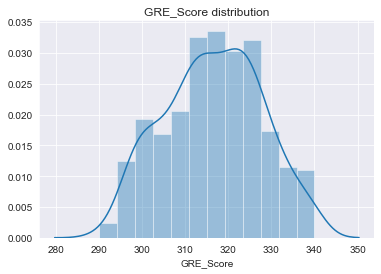

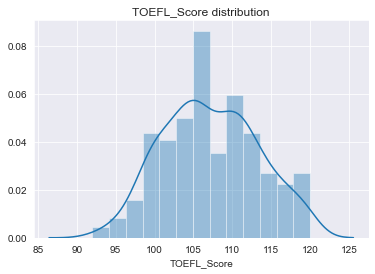

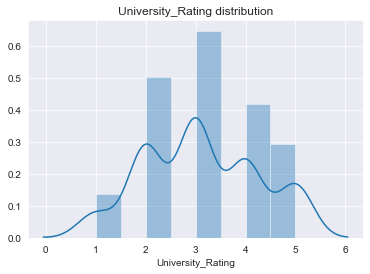

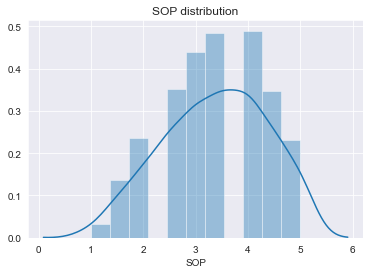

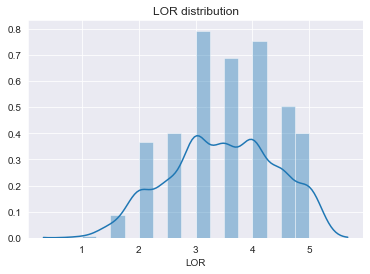

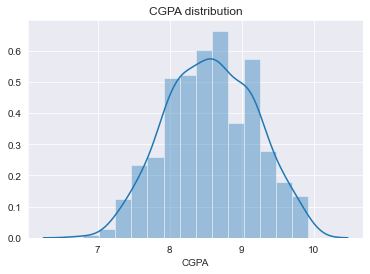

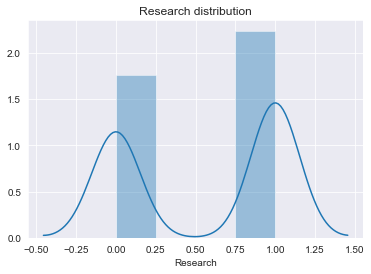

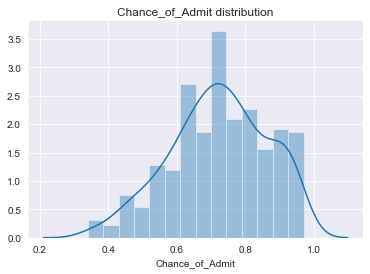

In [68]:
# Basic Visualizations

for col in admission_ds_raw_v1_df.columns:
    sns.distplot(admission_ds_raw_v1_df[col]).set_title(col + ' distribution')
    plt.show()

<h4>Producing a heatmap and pairplots for understanding variable correlations</h4>

Based on the created visualizations, we realized that Reasearch and LOR are not as strongly correlated to the other variables. That being said, we tried running models with excluding these variables to see if the results will improve. 
Also we realized that GRE_Score CGPA, and TOEFL_Score have the highest correlation with the chance of being admitted to a graduate school.  
As people who have applied/planning to apply to graduate schools, these results came surprising to us. Based on our research, we believed that chance of being admitted to a reputable university is more related to research background, good recommendation letters and higher GPA. 
We did not have access to the data for differnt majors, and this dataset does not provide any indication of the students' majors. We believe tha there are two possible explainations for this difference:
<ul>
    <li>Our view is biased towards Engineering and Science majors while this data seems to cover applicants from all majors</li>
    <li>The data may not be accurately collected or may be biased towards a certain population</li>
</ul>

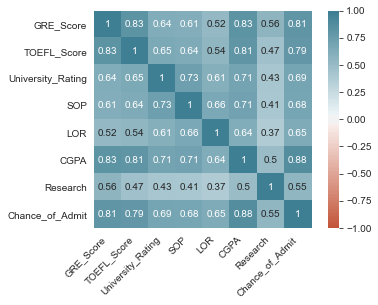

In [69]:
# Correlation between Variables: Heatmap

n_colors = 5 # Use 256 colors for the diverging color palette
palette = sns.diverging_palette(10, 22, n=n_colors) # Create the palette
color_min, color_max = [-1, 1] # Range of values that will be mapped to the palette, i.e. min and max possible correlatio

corr = admission_ds_raw_v1_df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True, annot = True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

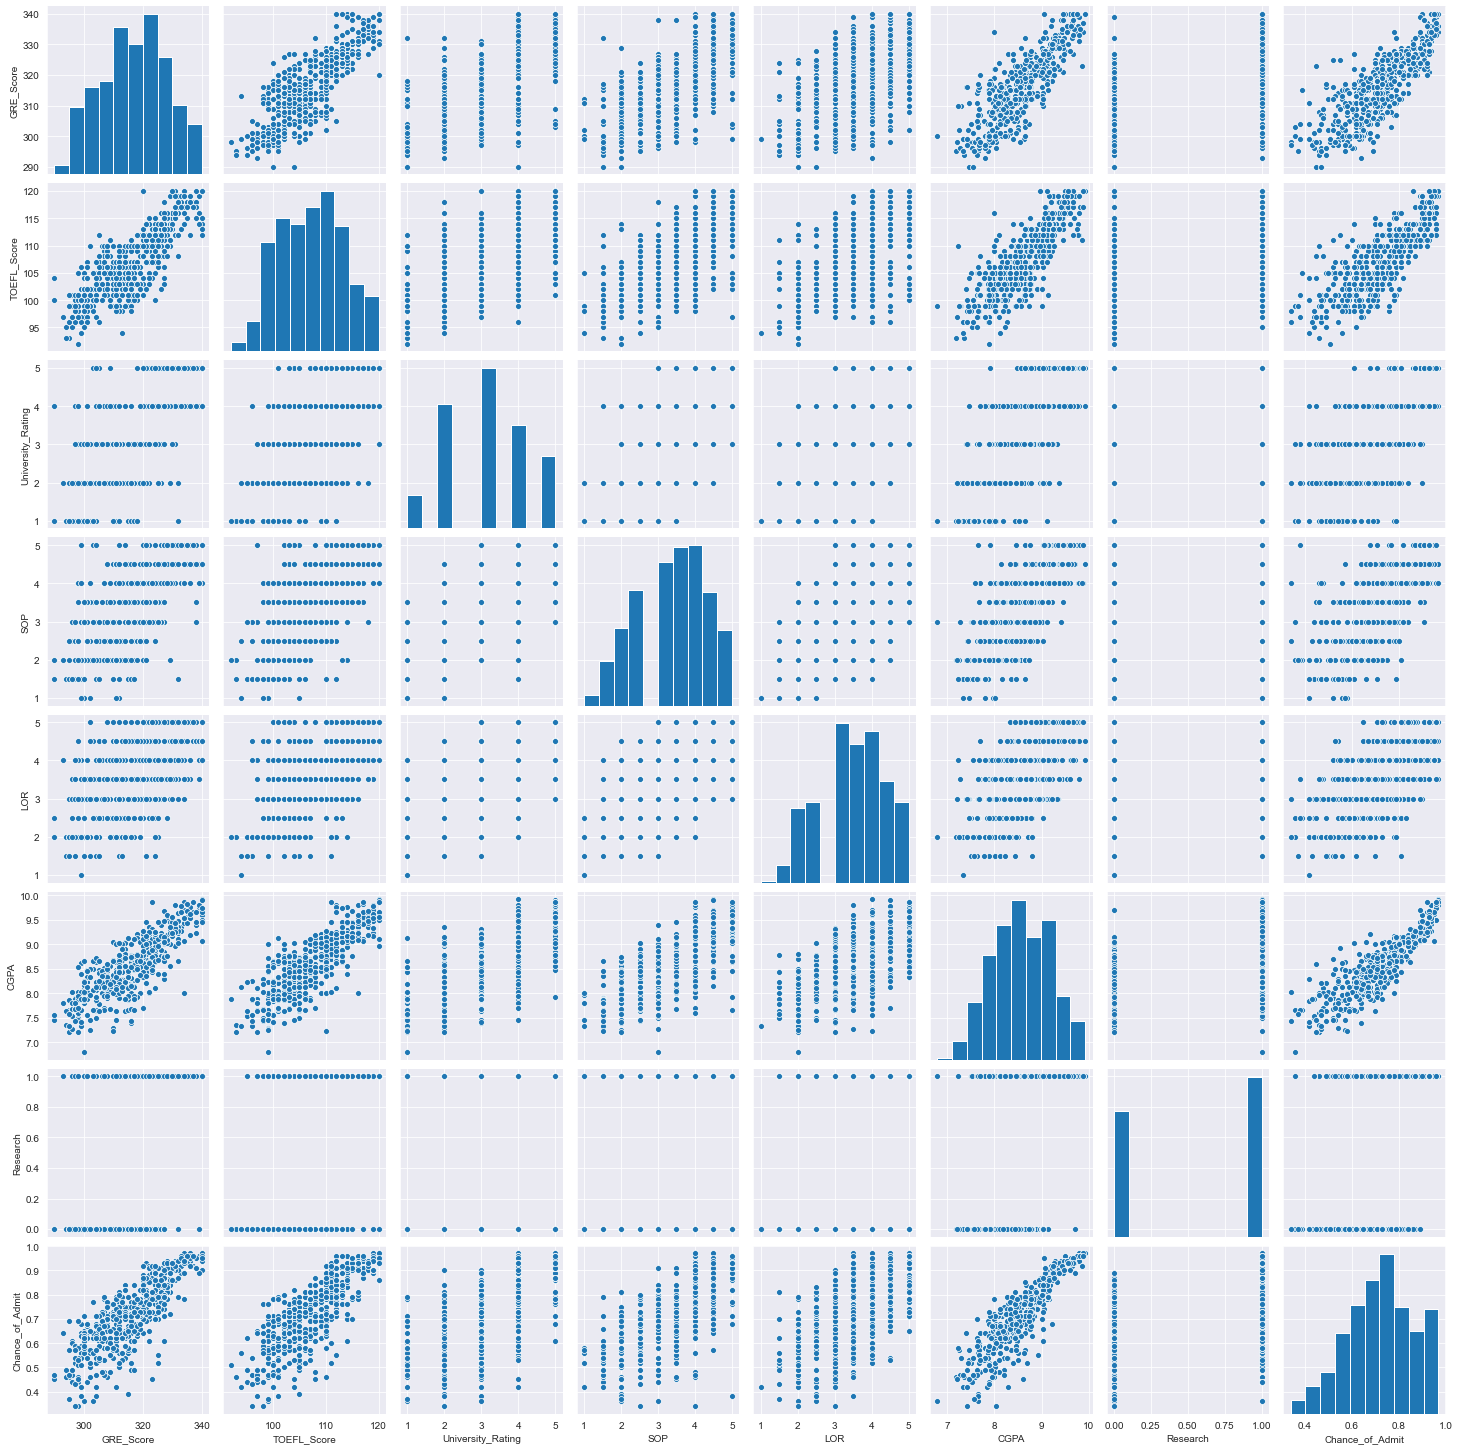

In [70]:
# Correlation between Variables: pairplots

sns.pairplot(admission_ds_raw_v1_df)

<h4><center>Modeling the Data</center></h4>
We first build a prototype model (linear regression) to understand the possible nuances and have a better idea to build additional models. 

In [71]:
# Building a protitype model
# Since our dataset is small, we will keep 20% of it for validation and perform training/testing on the remaining 80% using Cross-Validation

#Shuffle the dataset and split for CV and test sets
shuffled_admission_ds_raw_v1_df = shuffle(admission_ds_raw_v1_df)
X = shuffled_admission_ds_raw_v1_df.iloc[:, :-1]
y = shuffled_admission_ds_raw_v1_df.iloc[:,-1:]

X_train, X_validation, y_train, y_validation  = train_test_split(X, y, test_size = 0.2, random_state = 1)


print ("X_train (for CV) shape:") 
print(X_train.shape)
print ("y_train (for CV) shape:") 
print(y_train.shape)

print ("X_validation shape:")
print(X_validation.shape)
print ("y_validation shape:")
print(y_validation.shape)



X_train (for CV) shape:
(400, 7)
y_train (for CV) shape:
(400, 1)
X_validation shape:
(100, 7)
y_validation shape:
(100, 1)


<h4>5-Fold CV Training</h4>

In [72]:
lr_model = LinearRegression()
scores = cross_validate(lr_model, X_train, y_train, cv=5, scoring=('r2', 'neg_mean_squared_error'), return_train_score=True)
i = 0
print("Individual training scores _ 5fold CV")
for i in np.arange(5):
    print(f"\nFold {i+1}:")
    print(f"Mean_squared_error on training set: {scores['train_neg_mean_squared_error'][i]*(-1)}")
    print(f"R2 score on training set: {scores['train_r2'][i]}")
    i= i + 1
    
i = 0    
print("\n\nIndividual testing scores _ 5fold CV")
for i in np.arange(5):
    print(f"\nFold {i+1}:")
    print(f"Mean_squared_error on test set: {scores['test_neg_mean_squared_error'][i]*(-1)}")
    print(f"R2 score on test set: {scores['test_r2'][i]}")
    i= i + 1
          
print("\n\nMean of training scores _ 5fold CV")
print(f"Mean of MSE on training serts: {scores['train_neg_mean_squared_error'].mean()*(-1)}")
print(f"Mean of R2 on training serts: {scores['train_r2'].mean()}")
print("\n\nMean of test scores _ 5fold CV")
print(f"Mean of MSE on training serts: {scores['test_neg_mean_squared_error'].mean()*(-1)}")
print(f"Mean of R2 on training serts: {scores['test_r2'].mean()}")


Individual training scores _ 5fold CV

Fold 1:
Mean_squared_error on training set: 0.0034136375202017217
R2 score on training set: 0.8217156546876279

Fold 2:
Mean_squared_error on training set: 0.003200026663739515
R2 score on training set: 0.8368249113385593

Fold 3:
Mean_squared_error on training set: 0.003423009940939743
R2 score on training set: 0.8116362879780611

Fold 4:
Mean_squared_error on training set: 0.0034643208891512456
R2 score on training set: 0.8342775864591045

Fold 5:
Mean_squared_error on training set: 0.003400490182838225
R2 score on training set: 0.8181416919259865


Individual testing scores _ 5fold CV

Fold 1:
Mean_squared_error on test set: 0.003347725974642264
R2 score on test set: 0.8324397265777476

Fold 2:
Mean_squared_error on test set: 0.004216587926244865
R2 score on test set: 0.7636356868198994

Fold 3:
Mean_squared_error on test set: 0.0033273549570173463
R2 score on test set: 0.8575462330995278

Fold 4:
Mean_squared_error on test set: 0.0032404568254

<h4>10fold CV Results</h4>

In [73]:
lr_model = LinearRegression()
scores = cross_validate(lr_model, X_train, y_train, cv=10, scoring=('r2', 'neg_mean_squared_error'), return_train_score=True)
i = 0
print("Individual training scores _ 10fold CV")
for i in np.arange(10):
    print(f"\nFold {i+1}:")
    print(f"Mean_squared_error on training set: {scores['train_neg_mean_squared_error'][i]*(-1)}")
    print(f"R2 score on training set: {scores['train_r2'][i]}")
    i= i + 1
    
i = 0    
print("\n\nIndividual testing scores _ 10fold CV")
for i in np.arange(10):
    print(f"\nFold {i+1}:")
    print(f"Mean_squared_error on test set: {scores['test_neg_mean_squared_error'][i]*(-1)}")
    print(f"R2 score on test set: {scores['test_r2'][i]}")
    i= i + 1
          
print("\n\nMean of training scores _ 10fold CV")
print(f"Mean of MSE on training sets: {scores['train_neg_mean_squared_error'].mean()*(-1)}")
print(f"Mean of R2 on training sets: {scores['train_r2'].mean()}")
print("\n\nMean of test scores _ 10fold CV")
print(f"Mean of MSE on training sets: {scores['test_neg_mean_squared_error'].mean()*(-1)}")
print(f"Mean of R2 on training sets: {scores['test_r2'].mean()}")


Individual training scores _ 10fold CV

Fold 1:
Mean_squared_error on training set: 0.0034024427385813652
R2 score on training set: 0.8229772257566341

Fold 2:
Mean_squared_error on training set: 0.0033993939105791283
R2 score on training set: 0.8235065778351998

Fold 3:
Mean_squared_error on training set: 0.0033997228089075178
R2 score on training set: 0.8264171314406432

Fold 4:
Mean_squared_error on training set: 0.003212223918581526
R2 score on training set: 0.8335711859961005

Fold 5:
Mean_squared_error on training set: 0.0032925508481538115
R2 score on training set: 0.8244417628518742

Fold 6:
Mean_squared_error on training set: 0.003518874492864801
R2 score on training set: 0.8135420923451897

Fold 7:
Mean_squared_error on training set: 0.0034295600592753692
R2 score on training set: 0.8263155342421494

Fold 8:
Mean_squared_error on training set: 0.0034211566557373033
R2 score on training set: 0.831395973749649

Fold 9:
Mean_squared_error on training set: 0.003418940323368245
R2

Scores in test and trains in CV shows that the model is performing well and there is no overfitting or underfitting. Therefore, we can fit the model on training and test data. Then, we can use this model elvaluate its performance on the validation set.

In [74]:
lr_model.fit(X_train, y_train)

LinearRegression()

In [75]:
# validating the model
y_pred = lr_model.predict(X_train)
print('Mean Squared Error on train data ', mean_squared_error(y_train, y_pred))
print('R2 on vtrain data: ',  r2_score(y_train, y_pred))

Mean Squared Error on train data  0.0033955438280420225
R2 on vtrain data:  0.8242034865340555


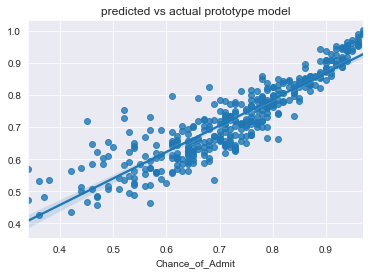

In [76]:
sns.regplot(x=y_train,y=y_pred)
plt.title('predicted vs actual prototype model')
plt.show()

<h4>Analyzing the Scores and Results</h4>
<p>The average scores for training the data using 5fold CV and 10 fold CV are very similar on all the folds. Also, comparing the results on each test split shows very similar performances. Therefore, the chances are that the training models are not overfitting the data. However, we will re-evaluate this assumption using the scores on the validation sets</p>
<p>After successful CV results, we trained a model on the entire training dataset and evaluated the results again. The MSE and R2 values are within the range of respectively calculated scores for each fold as well as on average.</p>

<h4>Validating the trained model on the validation dataset</h4>
After training a model and evaluating it on the test folds using 5-fold and 10-fold CV, we use an evaluation set to make sure the model is not overfitting and performs similarly on a new dataset. 

In [77]:
# validating the model
y_pred = lr_model.predict(X_validation)
print('Mean Squared Error on validation data ', mean_squared_error(y_validation, y_pred))
print('R2 on valdation data: ',  r2_score(y_validation, y_pred))


Mean Squared Error on validation data  0.004164579221334081
R2 on valdation data:  0.8076939775889324


The scores of using the model to predict the data using the validation set are very similar to training and testing scores on 5-fold and 10-fold CV data. In the section below we compare the predicted scores with the actual scores in a graph. 

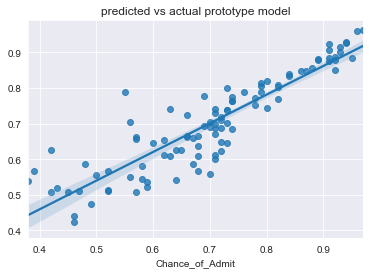

In [78]:
sns.regplot(x=y_validation,y=y_pred)
plt.title('predicted vs actual prototype model')
plt.show()

<h4>Checking the influence of each independent vaiable on predicting the dependent variable</h4>

The importance of each independent variable can be checked using the model.coef_ variable. We check the values to see if we can eliminate any from the input for training models. If a coefficient is very very small compared to the others or equals 0, it means that having it in the feature vector set does not add any values, thus it can be removed. 

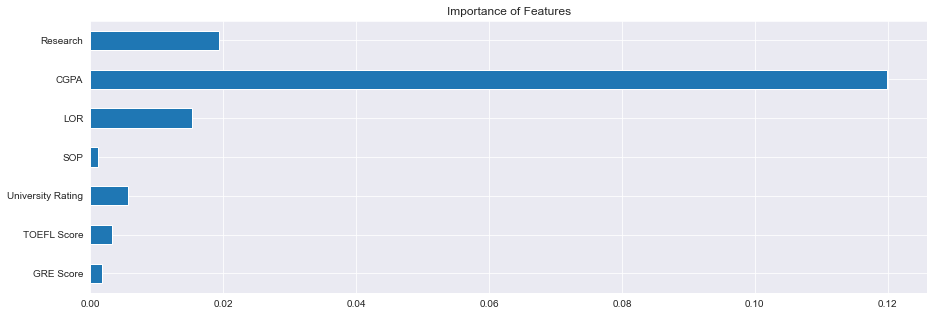

In [79]:
# Importance of Variables
importance=lr_model.coef_ 
type(lr_model.coef_ )
lr_model.coef_.ravel().shape
importance=pd.Series(lr_model.coef_.ravel(), index =['GRE Score','TOEFL Score','University Rating','SOP','LOR','CGPA','Research'])
importance.plot(kind='barh',title='Importance of Features',figsize=(15,5))

Based on the results as shown in the bar chart above, none of the feature impotance values is 0 or minimal compared to the others. So, for now, we keep them. 

<h4>Scaling the data using Minmax scaler</h4>
Now, we try training linear regression models using scaled data.<br>
First, 5-fold CV results:

In [80]:
# Building a protitype model
# Since our dataset is small, we will keep 20% of it for validation and perform training/testing on the remaining 80% using Cross-Validation

#Shuffle the dataset and split for CV and test sets
shuffled_admission_ds_raw_v1_df = shuffle(admission_ds_raw_v1_df)
X = shuffled_admission_ds_raw_v1_df.iloc[:, :-1]
y = shuffled_admission_ds_raw_v1_df.iloc[:,-1:]

X_train, X_validation, y_train, y_validation  = train_test_split(X, y, test_size = 0.2, random_state = 1)

#Variables defined for 5-fold and 10-fold cross validation

print ("X_train (for CV) shape:") 
print(X_train.shape)
print ("y_train (for CV) shape:") 
print(y_train.shape)

print ("X_validation shape:")
print(X_validation.shape)
print ("y_validation shape:")
print(y_validation.shape)


#Scaling Train data
scaler = MinMaxScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = ['GRE Score','TOEFL Score','University Rating','SOP','LOR','CGPA','Research'])
X_train.head()

X_train (for CV) shape:
(400, 7)
y_train (for CV) shape:
(400, 1)
X_validation shape:
(100, 7)
y_validation shape:
(100, 1)


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,0.72,0.571429,0.5,0.500,0.625,0.621324,0.0
1,0.20,0.250000,0.0,0.000,0.375,0.297794,0.0
2,0.42,0.357143,0.5,0.875,0.750,0.529412,1.0
3,0.84,0.928571,1.0,1.000,1.000,0.834559,1.0
4,0.40,0.321429,0.5,0.625,1.000,0.533088,1.0


The head function on X_train shows that it is scaled. 

<h4>5fold CV on Scaled Data</h4>

In [81]:
lr_model = LinearRegression()
scores = cross_validate(lr_model, X_train, y_train, cv=5, scoring=('r2', 'neg_mean_squared_error'), return_train_score=True)
i = 0
print("Individual training scores _ 5fold CV")
for i in np.arange(5):
    print(f"\nFold {i+1}:")
    print(f"Mean_squared_error on training set: {scores['train_neg_mean_squared_error'][i]*(-1)}")
    print(f"R2 score on training set: {scores['train_r2'][i]}")
    i= i + 1
    
i = 0    
print("\n\nIndividual testing scores _ 5fold CV")
for i in np.arange(5):
    print(f"\nFold {i+1}:")
    print(f"Mean_squared_error on test set: {scores['test_neg_mean_squared_error'][i]*(-1)}")
    print(f"R2 score on test set: {scores['test_r2'][i]}")
    i= i + 1
          
print("\n\nMean of training scores _ 5fold CV")
print(f"Mean of MSE on training sets: {scores['train_neg_mean_squared_error'].mean()*(-1)}")
print(f"Mean of R2 on training sets: {scores['train_r2'].mean()}")
print("\n\nMean of test scores _ 5fold CV")
print(f"Mean of MSE on training sets: {scores['test_neg_mean_squared_error'].mean()*(-1)}")
print(f"Mean of R2 on training sets: {scores['test_r2'].mean()}")

Individual training scores _ 5fold CV

Fold 1:
Mean_squared_error on training set: 0.003172180868975273
R2 score on training set: 0.8406336864256602

Fold 2:
Mean_squared_error on training set: 0.0036562365163808064
R2 score on training set: 0.827437318920335

Fold 3:
Mean_squared_error on training set: 0.003506655130685822
R2 score on training set: 0.8300058242305801

Fold 4:
Mean_squared_error on training set: 0.003508471019453844
R2 score on training set: 0.8249408507164244

Fold 5:
Mean_squared_error on training set: 0.003705289673192154
R2 score on training set: 0.8142896573639729


Individual testing scores _ 5fold CV

Fold 1:
Mean_squared_error on test set: 0.00502207057737783
R2 score on test set: 0.7731701052437154

Fold 2:
Mean_squared_error on test set: 0.0030572379573944467
R2 score on test set: 0.816557696955575

Fold 3:
Mean_squared_error on test set: 0.0036607579002413903
R2 score on test set: 0.807483051748392

Fold 4:
Mean_squared_error on test set: 0.00366442097916166

<h4>5fold CV on Scaled Data</h4>

In [82]:
r_model = LinearRegression()
scores = cross_validate(lr_model, X_train, y_train, cv=10, scoring=('r2', 'neg_mean_squared_error'), return_train_score=True)
i = 0
print("Individual training scores _ 10fold CV")
for i in np.arange(10):
    print(f"\nFold {i+1}:")
    print(f"Mean_squared_error on training set: {scores['train_neg_mean_squared_error'][i]*(-1)}")
    print(f"R2 score on training set: {scores['train_r2'][i]}")
    i= i + 1
    
i = 0    
print("\n\nIndividual testing scores _ 10fold CV")
for i in np.arange(10):
    print(f"\nFold {i+1}:")
    print(f"Mean_squared_error on test set: {scores['test_neg_mean_squared_error'][i]*(-1)}")
    print(f"R2 score on test set: {scores['test_r2'][i]}")
    i= i + 1
          
print("\n\nMean of training scores _ 10fold CV")
print(f"Mean of MSE on training sets: {scores['train_neg_mean_squared_error'].mean()*(-1)}")
print(f"Mean of R2 on training sets: {scores['train_r2'].mean()}")
print("\n\nMean of test scores _ 10fold CV")
print(f"Mean of MSE on training sets: {scores['test_neg_mean_squared_error'].mean()*(-1)}")
print(f"Mean of R2 on training sets: {scores['test_r2'].mean()}")



Individual training scores _ 10fold CV

Fold 1:
Mean_squared_error on training set: 0.0033193150077803807
R2 score on training set: 0.8365283961634822

Fold 2:
Mean_squared_error on training set: 0.0034117292364247076
R2 score on training set: 0.8293779326709644

Fold 3:
Mean_squared_error on training set: 0.003739516122523991
R2 score on training set: 0.8188656643860326

Fold 4:
Mean_squared_error on training set: 0.0034300531581838768
R2 score on training set: 0.8352317607532656

Fold 5:
Mean_squared_error on training set: 0.003466790011075064
R2 score on training set: 0.8297112693581212

Fold 6:
Mean_squared_error on training set: 0.0035583081701015293
R2 score on training set: 0.827311897661857

Fold 7:
Mean_squared_error on training set: 0.003594613666850064
R2 score on training set: 0.824630179526602

Fold 8:
Mean_squared_error on training set: 0.00344244482536069
R2 score on training set: 0.8273482868172594

Fold 9:
Mean_squared_error on training set: 0.003594355833749532
R2 sco

Scores in test and trains in CV shows that the model is performing well and there is no overfitting or underfitting. Therefore, we can fit the model on training and test data. Then, we can use this model elvaluate its performance on the validation set.

In [83]:
lr_model = LinearRegression()

In [84]:
lr_model.fit(X_train, y_train)

LinearRegression()

In [85]:
# validating the model
y_pred = lr_model.predict(X_train)
print('Mean Squared Error on train data ', mean_squared_error(y_train, y_pred))
print('R2 on test data: ',  r2_score(y_train, y_pred))

Mean Squared Error on train data  0.0035243049698779018
R2 on test data:  0.8268935486279885


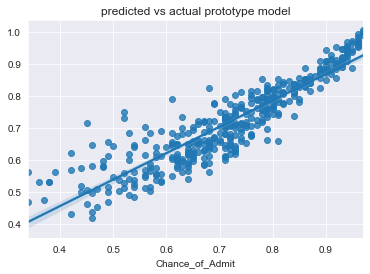

In [86]:
sns.regplot(x=y_train,y=y_pred)
plt.title('predicted vs actual prototype model')
plt.show()

<h4>Validating the trained model on the validation dataset</h4>
After training a model and evaluating it on the test folds using 5-fold and 10-fold CV, we use an evaluation set to make sure the model is not overfitting and performs similarly on a new dataset. 
We transform the evaluation set before running the model on it. 

In [87]:
#scaling validation set
X_validation = scaler.transform(X_validation)
# validating the model
y_pred = lr_model.predict(X_validation)
print('Mean Squared Error on validation data ', mean_squared_error(y_validation, y_pred))
print('R2 on valdation data: ',  r2_score(y_validation, y_pred))

Mean Squared Error on validation data  0.0036543226916234094
R2 on valdation data:  0.7965320694478506


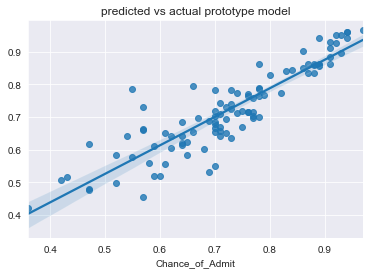

In [88]:
sns.regplot(x=y_validation,y=y_pred)
plt.title('predicted vs actual prototype model')
plt.show()

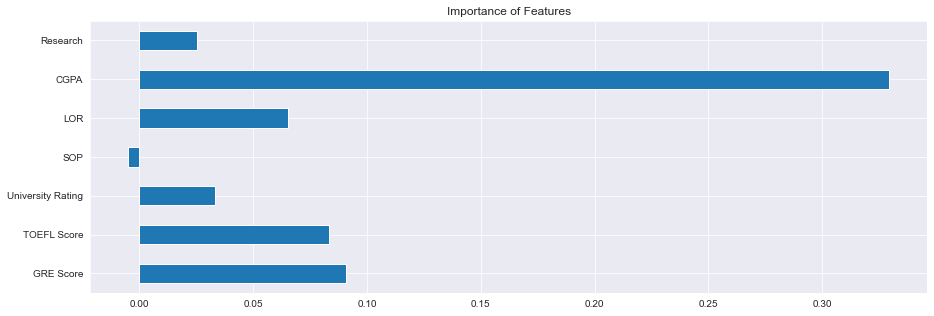

In [89]:
# Importance of Variables
importance=lr_model.coef_ 
type(lr_model.coef_ )
lr_model.coef_.ravel().shape
importance=pd.Series(lr_model.coef_.ravel(), index =['GRE Score','TOEFL Score','University Rating','SOP','LOR','CGPA','Research'])
importance.plot(kind='barh',title='Importance of Features',figsize=(15,5))

<h4>Comparing Training Results on scaled and unscaled data</h4>

<table style="width:100%">
<tr>
    <th>Training R2 Score without scaling  </th>
    <th>Training R2 Score with scaling     </th>
    <th>Training MSE Score without scaling </th>
    <th>Training MSE Score with scaling    </th>
</tr>

<tr>
<td>0.8242   </td>
<td>0.8269   </td>
<td>0.003396 </td>
<td>0.003524 </td> 
</tr>
    
</table>

The results are very similar, but are showing better results on training data. 

<h4>Comparing the validation set Results on scaled and unscaled data</h4>

<table style="width:100%">
<tr>
    <th>Validation R2 Score without scaling         </th>
    <th>Validation R2 Score with scaling             </th>
    <th>Validation MSE Score without scaling         </th>
    <th>Validation MSE Score with scaling             </th>
</tr>

<tr>
<td>0.8079            </td>
<td>0.7965             </td>
<td>0.004165            </td>
<td>0.003654           </td> 
</tr>
    
</table>

Unlike training data, scaling shows better results on validation data. MSE seems highly improved. 
That being said, going forward, we will use data scaling. 
Also, the graphs produced to show variable importance show different importance for the same variables when data is scaled vs. when it is not. In the non-scaled data, GRE and TOEFL scores seems to have the least coefficient values. However, since they have bigger values, their coefficients are less. 

<h4>Training other regression models using the data</h4>
The models we will test:
<ul>
    <li>Descision Tree</li>
    <li>Random_Forrest_Regressor</li>
    <li>Linear_Regression</li>
    <li>KN_regressor</li>
    <li>SVR_model</li>
    <li>AdaBosst Regressor</li>
    <li>GradientBoosting Regressor</li>
    <li>CatBoostRegressor</li>
    <li>XGBRegressor</li>
</ul>

We use scaled data and 10-fold cv based on the results we obtained in building the prototype model.

In [90]:
#Shuffle the dataset and split for CV and test sets
shuffled_admission_ds_raw_v1_df = shuffle(admission_ds_raw_v1_df)
X = shuffled_admission_ds_raw_v1_df.iloc[:, :-1]
y = shuffled_admission_ds_raw_v1_df.iloc[:,-1:]

X_train, X_validation, y_train, y_validation  = train_test_split(X, y, test_size = 0.2, random_state = 1)

print ("X_train (for CV) shape:") 
print(X_train.shape)
print ("y_train (for CV) shape:") 
print(y_train.shape)

print ("X_validation shape:")
print(X_validation.shape)
print ("y_validation shape:")
print(y_validation.shape)


#Scaling Train data
scaler = MinMaxScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = ['GRE_Score','TOEFL_Score','University_Rating','SOP','LOR','CGPA','Research'])
X_validation = pd.DataFrame(scaler.transform(X_validation), columns = ['GRE_Score','TOEFL_Score','University_Rating','SOP','LOR','CGPA','Research'])

X_train (for CV) shape:
(400, 7)
y_train (for CV) shape:
(400, 1)
X_validation shape:
(100, 7)
y_validation shape:
(100, 1)


In [91]:
model_list = [("Decision_Tree", DecisionTreeRegressor(random_state=5, splitter = 'best', max_depth =2)),
               ("Random_Forrest_Regressor", RandomForestRegressor(max_depth = 5, random_state=5, n_jobs=-1, n_estimators= 50, max_features =5, min_samples_leaf = 2)),
               ("KN_regressor", KNeighborsRegressor(n_jobs=-1)),
              ("SVR_model",SVR(kernel = 'rbf', C= 0.0005)),
              ('ABR_model',AdaBoostRegressor(random_state=5)),
              ('GBR_model',GradientBoostingRegressor(random_state=5)),
              ('CatBoost', CatBoostRegressor(random_state = 5, eval_metric = 'R2', verbose= False)),
              ('XGB_model',XGBRegressor(random_state=5,n_jobs=-1))]

<h4>Decision Tree Training and Validation</h4>

In [92]:
#We selected the hyper parameter values after testing multiple optins. The initial validation results: r2= -3.278874057590606 and MSE = 0.087
dt_model = DecisionTreeRegressor(random_state=5, splitter = 'best', max_depth =2)
scores = cross_validate(dt_model, X_train, y_train, cv=10, scoring=('r2', 'neg_mean_squared_error'), return_train_score=True)
"""i = 0
print("\n\n****************************Decision Tree 10fold CV scores")
print("Individual training scores _ 10fold CV")
for i in np.arange(10):
    print(f"\nFold {i+1}:")
    print(f"Mean_squared_error on training set: {scores['train_neg_mean_squared_error'][i]*(-1)}")
    print(f"R2 score on training set: {scores['train_r2'][i]}")
    i= i + 1
    
i = 0    
print("\n\nIndividual testing scores _ 10fold CV")
for i in np.arange(10):
    print(f"\nFold {i+1}:")
    print(f"Mean_squared_error on test set: {scores['test_neg_mean_squared_error'][i]*(-1)}")
    print(f"R2 score on test set: {scores['test_r2'][i]}")
    i= i + 1"""
          
print("\n\nMean of training scores _ 10fold CV")
print(f"Mean of MSE on training serts: {scores['train_neg_mean_squared_error'].mean()*(-1)}")
print(f"Mean of R2 on training serts: {scores['train_r2'].mean()}")
print("\n\nMean of test scores _ 10fold CV")
print(f"Mean of MSE on training sets: {scores['test_neg_mean_squared_error'].mean()*(-1)}")
print(f"Mean of R2 on training sets: {scores['test_r2'].mean()}")


print("\n\nDecsion Tree results on validation data")
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_validation)
print("Mean Squared Error on validation data", mean_squared_error(y_validation, y_pred))
print('R2 on valdation data: ',  r2_score(y_validation, y_pred))



Mean of training scores _ 10fold CV
Mean of MSE on training serts: 0.004988262090538307
Mean of R2 on training serts: 0.760086259948357


Mean of test scores _ 10fold CV
Mean of MSE on training sets: 0.005923393236185852
Mean of R2 on training sets: 0.7027311878670297


Decsion Tree results on validation data
Mean Squared Error on validation data 0.006122516047439248
R2 on valdation data:  0.6215258327683745


<h4>Random_Forrest_Regressor Training and Validation</h4>

In [93]:
#We selected the hyper parameter values after testing multiple optins. The initial validation results: r2= -3 and MSE = 0.081
rf_model = RandomForestRegressor(max_depth =10, random_state=5, max_features =5, min_samples_leaf = 2)
scores = cross_validate(rf_model, X_train, y_train.values.ravel(), cv=10, scoring=('r2', 'neg_mean_squared_error'), return_train_score=True)
i = 0
print("\n\n****************************Random Forest 10fold CV scores")
"""print("Individual training scores _ 10fold CV")
for i in np.arange(10):
    print(f"\nFold {i+1}:")
    print(f"Mean_squared_error on training set: {scores['train_neg_mean_squared_error'][i]*(-1)}")
    print(f"R2 score on training set: {scores['train_r2'][i]}")
    i= i + 1
    
i = 0    
print("\n\nIndividual testing scores _ 10fold CV")
for i in np.arange(10):
    print(f"\nFold {i+1}:")
    print(f"Mean_squared_error on test set: {scores['test_neg_mean_squared_error'][i]*(-1)}")
    print(f"R2 score on test set: {scores['test_r2'][i]}")
    i= i + 1
"""
          
print("\n\nMean of training scores _ 10fold CV")
print(f"Mean of MSE on training serts: {scores['train_neg_mean_squared_error'].mean()*(-1)}")
print(f"Mean of R2 on training serts: {scores['train_r2'].mean()}")
print("\n\nMean of test scores _ 10fold CV")
print(f"Mean of MSE on training serts: {scores['test_neg_mean_squared_error'].mean()*(-1)}")
print(f"Mean of R2 on training serts: {scores['test_r2'].mean()}")


print("\n\nRandom Forest results on validation data")
rf_model.fit(X_train, y_train.values.ravel())
y_pred = rf_model.predict(X_validation)
print("Mean Squared Error on validation data", mean_squared_error(y_validation.values.ravel(), y_pred))
print('R2 on valdation data: ',  r2_score(y_validation, y_pred))



****************************Random Forest 10fold CV scores


Mean of training scores _ 10fold CV
Mean of MSE on training serts: 0.0011412940491306307
Mean of R2 on training serts: 0.9450954940891594


Mean of test scores _ 10fold CV
Mean of MSE on training serts: 0.004045704360753688
Mean of R2 on training serts: 0.7983136178492221


Random Forest results on validation data
Mean Squared Error on validation data 0.004249870766238923
R2 on valdation data:  0.7372867156849592


<h4>KN Regression Training and Validation</h4>

In [94]:
#Scaling Train data
#scaler = MinMaxScaler()
#X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = ['GRE_Score','TOEFL_Score','University_Rating','SOP','LOR','CGPA','Research'])

knr_model = KNeighborsRegressor(n_jobs=-1)
scores = cross_validate(knr_model, X_train, y_train.values.ravel(), cv=10, scoring=('r2', 'neg_mean_squared_error'), return_train_score=True)
i = 0
print("\n\n****************************KNeighborsRegressor 10fold CV scores")
"""print("Individual training scores _ 10fold CV")
for i in np.arange(10):
    print(f"\nFold {i+1}:")
    print(f"Mean_squared_error on training set: {scores['train_neg_mean_squared_error'][i]*(-1)}")
    print(f"R2 score on training set: {scores['train_r2'][i]}")
    i= i + 1
    
i = 0    
print("\n\nIndividual testing scores _ 10fold CV")
for i in np.arange(10):
    print(f"\nFold {i+1}:")
    print(f"Mean_squared_error on test set: {scores['test_neg_mean_squared_error'][i]*(-1)}")
    print(f"R2 score on test set: {scores['test_r2'][i]}")
    i= i + 1
"""
          
print("\n\nMean of training scores _ 10fold CV")
print(f"Mean of MSE on training serts: {scores['train_neg_mean_squared_error'].mean()*(-1)}")
print(f"Mean of R2 on training serts: {scores['train_r2'].mean()}")
print("\n\nMean of test scores _ 10fold CV")
print(f"Mean of MSE on training serts: {scores['test_neg_mean_squared_error'].mean()*(-1)}")
print(f"Mean of R2 on training serts: {scores['test_r2'].mean()}")


print("\n\nKNRegressor results on validation data")
knr_model.fit(X_train, y_train.values.ravel())
y_pred = knr_model.predict(X_validation)
print("Mean Squared Error on validation data", mean_squared_error(y_validation.values.ravel(), y_pred))
print('R2 on valdation data: ',  r2_score(y_validation, y_pred))



****************************KNeighborsRegressor 10fold CV scores


Mean of training scores _ 10fold CV
Mean of MSE on training serts: 0.0029808699999999996
Mean of R2 on training serts: 0.8565995353801584


Mean of test scores _ 10fold CV
Mean of MSE on training serts: 0.004478879999999999
Mean of R2 on training serts: 0.7740466639470749


KNRegressor results on validation data
Mean Squared Error on validation data 0.00473132
R2 on valdation data:  0.7075250790636489


<h4>SVR_model Training and Validation</h4>

In [95]:
svr_model = SVR(kernel = 'rbf', C= 0.1)
scores = cross_validate(svr_model, X_train, y_train.values.ravel(), cv=10, scoring=('r2', 'neg_mean_squared_error'), return_train_score=True)
i = 0
print("\n\n****************************SVR 10fold CV scores")
"""print("Individual training scores _ 10fold CV")
for i in np.arange(10):
    print(f"\nFold {i+1}:")
    print(f"Mean_squared_error on training set: {scores['train_neg_mean_squared_error'][i]*(-1)}")
    print(f"R2 score on training set: {scores['train_r2'][i]}")
    i= i + 1
    
i = 0    
print("\n\nIndividual testing scores _ 10fold CV")
for i in np.arange(10):
    print(f"\nFold {i+1}:")
    print(f"Mean_squared_error on test set: {scores['test_neg_mean_squared_error'][i]*(-1)}")
    print(f"R2 score on test set: {scores['test_r2'][i]}")
    i= i + 1
"""
          
print("\n\nMean of training scores _ 10fold CV")
print(f"Mean of MSE on training serts: {scores['train_neg_mean_squared_error'].mean()*(-1)}")
print(f"Mean of R2 on training serts: {scores['train_r2'].mean()}")
print("\n\nMean of test scores _ 10fold CV")
print(f"Mean of MSE on training serts: {scores['test_neg_mean_squared_error'].mean()*(-1)}")
print(f"Mean of R2 on training serts: {scores['test_r2'].mean()}")


print("\n\nSVR results on validation data")
svr_model.fit(X_train, y_train.values.ravel())
y_pred = svr_model.predict(X_validation)
#print("Mean Squared Error on validation data", mean_squared_error(y_validation, y_pred))
print("Mean Squared Error on validation data", mean_squared_error(y_validation.values.ravel(), y_pred))
print('R2 on valdation data: ',  r2_score(y_validation, y_pred))



****************************SVR 10fold CV scores


Mean of training scores _ 10fold CV
Mean of MSE on training serts: 0.004747284269883822
Mean of R2 on training serts: 0.7716444575827267


Mean of test scores _ 10fold CV
Mean of MSE on training serts: 0.005384859320517255
Mean of R2 on training serts: 0.731197620392879


SVR results on validation data
Mean Squared Error on validation data 0.004937132357488769
R2 on valdation data:  0.6948024238671601


<h4>AdaBoostRegressor Training and Validation</h4>

In [96]:
abr_model = AdaBoostRegressor(random_state=5)
scores = cross_validate(abr_model, X_train, y_train.values.ravel(), cv=10, scoring=('r2', 'neg_mean_squared_error'), return_train_score=True)
i = 0
print("\n\n****************************SVR 10fold CV scores")
"""print("Individual training scores _ 10fold CV")
for i in np.arange(10):
    print(f"\nFold {i+1}:")
    print(f"Mean_squared_error on training set: {scores['train_neg_mean_squared_error'][i]*(-1)}")
    print(f"R2 score on training set: {scores['train_r2'][i]}")
    i= i + 1
    
i = 0    
print("\n\nIndividual testing scores _ 10fold CV")
for i in np.arange(10):
    print(f"\nFold {i+1}:")
    print(f"Mean_squared_error on test set: {scores['test_neg_mean_squared_error'][i]*(-1)}")
    print(f"R2 score on test set: {scores['test_r2'][i]}")
    i= i + 1
"""
          
print("\n\nMean of training scores _ 10fold CV")
print(f"Mean of MSE on training serts: {scores['train_neg_mean_squared_error'].mean()*(-1)}")
print(f"Mean of R2 on training serts: {scores['train_r2'].mean()}")
print("\n\nMean of test scores _ 10fold CV")
print(f"Mean of MSE on training serts: {scores['test_neg_mean_squared_error'].mean()*(-1)}")
print(f"Mean of R2 on training serts: {scores['test_r2'].mean()}")


print("\n\nSVR results on validation data")
svr_model.fit(X_train, y_train.values.ravel())
y_pred = svr_model.predict(X_validation)
print("Mean Squared Error on validation data", mean_squared_error(y_validation.values.ravel(), y_pred))
print('R2 on valdation data: ',  r2_score(y_validation, y_pred))



****************************SVR 10fold CV scores


Mean of training scores _ 10fold CV
Mean of MSE on training serts: 0.00338849841545043
Mean of R2 on training serts: 0.8369620407862927


Mean of test scores _ 10fold CV
Mean of MSE on training serts: 0.00497269939018617
Mean of R2 on training serts: 0.7539517766642991


SVR results on validation data
Mean Squared Error on validation data 0.004937132357488769
R2 on valdation data:  0.6948024238671601


<h4>Gradient Boosting Regressor Training and Validation</h4>

In [97]:
gbr_model = GradientBoostingRegressor(random_state=5, min_samples_split = 100, min_samples_leaf = 10)
scores = cross_validate(gbr_model, X_train, y_train.values.ravel(), cv=10, scoring=('r2', 'neg_mean_squared_error'), return_train_score=True)
i = 0
print("\n\n****************************Gradient Boosting Regressor 10fold CV scores")
"""print("Individual training scores _ 10fold CV")
for i in np.arange(10):
    print(f"\nFold {i+1}:")
    print(f"Mean_squared_error on training set: {scores['train_neg_mean_squared_error'][i]*(-1)}")
    print(f"R2 score on training set: {scores['train_r2'][i]}")
    i= i + 1
    
i = 0    
print("\n\nIndividual testing scores _ 10fold CV")
for i in np.arange(10):
    print(f"\nFold {i+1}:")
    print(f"Mean_squared_error on test set: {scores['test_neg_mean_squared_error'][i]*(-1)}")
    print(f"R2 score on test set: {scores['test_r2'][i]}")
    i= i + 1
"""
          
print("\n\nMean of training scores _ 10fold CV")
print(f"Mean of MSE on training serts: {scores['train_neg_mean_squared_error'].mean()*(-1)}")
print(f"Mean of R2 on training serts: {scores['train_r2'].mean()}")
print("\n\nMean of test scores _ 10fold CV")
print(f"Mean of MSE on training serts: {scores['test_neg_mean_squared_error'].mean()*(-1)}")
print(f"Mean of R2 on training serts: {scores['test_r2'].mean()}")


print("\n\nGradient Boosting Regressor results on validation data")
gbr_model.fit(X_train, y_train.values.ravel())
y_pred = gbr_model.predict(X_validation)
print("Mean Squared Error on validation data", mean_squared_error(y_validation.values.ravel(), y_pred))
print('R2 on valdation data: ',  r2_score(y_validation, y_pred))



****************************Gradient Boosting Regressor 10fold CV scores


Mean of training scores _ 10fold CV
Mean of MSE on training serts: 0.0022305483907937734
Mean of R2 on training serts: 0.8926641057685367


Mean of test scores _ 10fold CV
Mean of MSE on training serts: 0.0038805201921497516
Mean of R2 on training serts: 0.8062420235382968


Gradient Boosting Regressor results on validation data
Mean Squared Error on validation data 0.004898904570304296
R2 on valdation data:  0.697165542200807


<h4>Cat Boosting Regressor Training and Validation</h4>

In [98]:
cb_model = CatBoostRegressor(random_state = 5, eval_metric = 'R2', verbose= False, learning_rate = 0.01, depth = 3)
scores = cross_validate(cb_model, X_train, y_train.values.ravel(), cv=10, scoring=('r2', 'neg_mean_squared_error'), return_train_score=True)
i = 0
print("\n\n****************************Cat Boosting Regressor Training and Validation 10fold CV scores")
"""print("Individual training scores _ 10fold CV")
for i in np.arange(10):
    print(f"\nFold {i+1}:")
    print(f"Mean_squared_error on training set: {scores['train_neg_mean_squared_error'][i]*(-1)}")
    print(f"R2 score on training set: {scores['train_r2'][i]}")
    i= i + 1
    
i = 0    
print("\n\nIndividual testing scores _ 10fold CV")
for i in np.arange(10):
    print(f"\nFold {i+1}:")
    print(f"Mean_squared_error on test set: {scores['test_neg_mean_squared_error'][i]*(-1)}")
    print(f"R2 score on test set: {scores['test_r2'][i]}")
    i= i + 1
"""
          
print("\n\nMean of training scores _ 10fold CV")
print(f"Mean of MSE on training serts: {scores['train_neg_mean_squared_error'].mean()*(-1)}")
print(f"Mean of R2 on training serts: {scores['train_r2'].mean()}")
print("\n\nMean of test scores _ 10fold CV")
print(f"Mean of MSE on training serts: {scores['test_neg_mean_squared_error'].mean()*(-1)}")
print(f"Mean of R2 on training serts: {scores['test_r2'].mean()}")


print("\n\nCat Boosting Regressor Training and Validation results on validation data")
cb_model.fit(X_train, y_train.values.ravel())
y_pred = cb_model.predict(X_validation)
print("Mean Squared Error on validation data", mean_squared_error(y_validation.values.ravel(), y_pred))
print('R2 on valdation data: ',  r2_score(y_validation, y_pred))



****************************Cat Boosting Regressor Training and Validation 10fold CV scores


Mean of training scores _ 10fold CV
Mean of MSE on training serts: 0.0024760656953132314
Mean of R2 on training serts: 0.8808647073991587


Mean of test scores _ 10fold CV
Mean of MSE on training serts: 0.003683761466064836
Mean of R2 on training serts: 0.8159331373097392


Cat Boosting Regressor Training and Validation results on validation data
Mean Squared Error on validation data 0.004084879894384175
R2 on valdation data:  0.7474859184869125


<h4>XGBRegressor Training and Validation</h4>

In [99]:
xgb_model = XGBRegressor(random_state=5,n_jobs=-1, booster = 'gblinear', eta = 0.5)
scores = cross_validate(xgb_model, X_train, y_train.values.ravel(), cv=10, scoring=('r2', 'neg_mean_squared_error'), return_train_score=True)
i = 0
print("\n\n****************************Cat Boosting Regressor Training and Validation 10fold CV scores")
"""print("Individual training scores _ 10fold CV")
for i in np.arange(10):
    print(f"\nFold {i+1}:")
    print(f"Mean_squared_error on training set: {scores['train_neg_mean_squared_error'][i]*(-1)}")
    print(f"R2 score on training set: {scores['train_r2'][i]}")
    i= i + 1
    
i = 0    
print("\n\nIndividual testing scores _ 10fold CV")
for i in np.arange(10):
    print(f"\nFold {i+1}:")
    print(f"Mean_squared_error on test set: {scores['test_neg_mean_squared_error'][i]*(-1)}")
    print(f"R2 score on test set: {scores['test_r2'][i]}")
    i= i + 1
"""
          
print("\n\nMean of training scores _ 10fold CV")
print(f"Mean of MSE on training serts: {scores['train_neg_mean_squared_error'].mean()*(-1)}")
print(f"Mean of R2 on training serts: {scores['train_r2'].mean()}")
print("\n\nMean of test scores _ 10fold CV")
print(f"Mean of MSE on training serts: {scores['test_neg_mean_squared_error'].mean()*(-1)}")
print(f"Mean of R2 on training serts: {scores['test_r2'].mean()}")


print("\n\nCat Boosting Regressor Training and Validation results on validation data")
xgb_model.fit(X_train, y_train.values.ravel())
y_pred = xgb_model.predict(X_validation)
print("Mean Squared Error on validation data", mean_squared_error(y_validation.values.ravel(), y_pred))
print('R2 on valdation data: ',  r2_score(y_validation, y_pred))



****************************Cat Boosting Regressor Training and Validation 10fold CV scores


Mean of training scores _ 10fold CV
Mean of MSE on training serts: 0.003540875930807582
Mean of R2 on training serts: 0.8296566012470674


Mean of test scores _ 10fold CV
Mean of MSE on training serts: 0.003711827386343381
Mean of R2 on training serts: 0.8153741791604275


Cat Boosting Regressor Training and Validation results on validation data
Mean Squared Error on validation data 0.003718345951112564
R2 on valdation data:  0.7701438630095516


<h4>What about ANNs?</h4>

We decided to test ANNs and see if they perform any better.
We implemented ANNs with one and two layers

In [100]:
def baseline_model():
	# create model
	model = Sequential()
	model.add(Dense(7, input_dim=7, kernel_initializer='normal', activation='relu'))
	model.add(Dense(1, kernel_initializer='normal'))
	# Compile model
	model.compile(loss='mean_squared_error', optimizer='adam')
	return model

In [101]:
estimator = KerasRegressor(build_fn=baseline_model, epochs=100, batch_size=5, verbose=0)
kfold = KFold(n_splits=10)
results = cross_val_score(estimator, X_train, y_train, cv=kfold)
print("Results: %.5f (%.5f) MSE" % (results.mean(), results.std()))

Results: -0.00371 (0.00090) MSE


In [102]:
def larger_model():
	# create model
	model = Sequential()
	model.add(Dense(7, input_dim=7, kernel_initializer='normal', activation='relu'))
	model.add(Dense(6, kernel_initializer='normal', activation='relu'))
	model.add(Dense(1, kernel_initializer='normal'))
	# Compile model
	model.compile(loss='mean_squared_error', optimizer='adam')
	return model

In [103]:
larger_estimator = KerasRegressor(build_fn=larger_model, epochs=100, batch_size=5, verbose=0)
kfold = KFold(n_splits=10)
results = cross_val_score(larger_estimator, X_train, y_train, cv=kfold)
print("Results: %.5f (%.5f) MSE" % (results.mean(), results.std()))


Results: -0.00568 (0.00644) MSE


In [104]:
ANN_model_12 = Sequential()
ANN_model_12.add(Dense(7, input_dim=7, kernel_initializer='normal', activation='relu'))
ANN_model_12.add(Dense(3, kernel_initializer='normal', activation='relu'))
ANN_model_12.add(Dense(1, kernel_initializer='normal'))
	# Compile model
ANN_model_12.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.2), metrics= ['mean_squared_error'])

In [105]:
ANN_model_12.fit(X_train, y_train, epochs=150, batch_size=10)


Epoch 1/150
40/40 [==============================] - 0s 506us/step - loss: 0.1221 - mean_squared_error: 0.1221
Epoch 2/150
40/40 [==============================] - 0s 488us/step - loss: 0.0241 - mean_squared_error: 0.0241
Epoch 3/150
40/40 [==============================] - 0s 541us/step - loss: 0.0214 - mean_squared_error: 0.0214
Epoch 4/150
40/40 [==============================] - 0s 544us/step - loss: 0.0229 - mean_squared_error: 0.0229
Epoch 5/150
40/40 [==============================] - 0s 601us/step - loss: 0.0282 - mean_squared_error: 0.0282
Epoch 6/150
40/40 [==============================] - 0s 600us/step - loss: 0.0275 - mean_squared_error: 0.0275
Epoch 7/150
40/40 [==============================] - 0s 578us/step - loss: 0.0232 - mean_squared_error: 0.0232
Epoch 8/150
40/40 [==============================] - 0s 584us/step - loss: 0.0205 - mean_squared_error: 0.0205
Epoch 9/150
40/40 [==============================] - 0s 576us/step - loss: 0.0208 - mean_squared_error: 0.0208
E

40/40 [==============================] - 0s 567us/step - loss: 0.0232 - mean_squared_error: 0.0232
Epoch 75/150
40/40 [==============================] - 0s 563us/step - loss: 0.0230 - mean_squared_error: 0.0230
Epoch 76/150
40/40 [==============================] - 0s 532us/step - loss: 0.0228 - mean_squared_error: 0.0228
Epoch 77/150
40/40 [==============================] - 0s 502us/step - loss: 0.0230 - mean_squared_error: 0.0230
Epoch 78/150
40/40 [==============================] - 0s 511us/step - loss: 0.0227 - mean_squared_error: 0.0227
Epoch 79/150
40/40 [==============================] - 0s 686us/step - loss: 0.0213 - mean_squared_error: 0.0213
Epoch 80/150
40/40 [==============================] - 0s 733us/step - loss: 0.0198 - mean_squared_error: 0.0198
Epoch 81/150
40/40 [==============================] - 0s 657us/step - loss: 0.0272 - mean_squared_error: 0.0272
Epoch 82/150
40/40 [==============================] - 0s 619us/step - loss: 0.0221 - mean_squared_error: 0.0221
Epoch

40/40 [==============================] - 0s 497us/step - loss: 0.0223 - mean_squared_error: 0.0223
Epoch 147/150
40/40 [==============================] - 0s 495us/step - loss: 0.0205 - mean_squared_error: 0.0205
Epoch 148/150
40/40 [==============================] - 0s 519us/step - loss: 0.0238 - mean_squared_error: 0.0238
Epoch 149/150
40/40 [==============================] - 0s 538us/step - loss: 0.0259 - mean_squared_error: 0.0259
Epoch 150/150
40/40 [==============================] - 0s 567us/step - loss: 0.0249 - mean_squared_error: 0.0249


print((ANN_model_1l.metrics.))

In [106]:
_, mean_squared_error = ANN_model_12.evaluate(X_validation, y_validation, verbose=0)


In [107]:
print('mean_squared_error: %.5f' % (mean_squared_error))

mean_squared_error: 0.02340


In [108]:
#r2_score(ANN_model_12.predict(X_validation), y_validation)

In [109]:
ANN_model_l1 = Sequential()
ANN_model_l1.add(Dense(7, input_dim=7, kernel_initializer='normal', activation='relu'))
ANN_model_l1.add(Dense(1, kernel_initializer='normal'))
	# Compile model
ANN_model_l1.compile(loss='mean_squared_error', optimizer='adam', metrics= ['mean_squared_error'])

In [110]:
ANN_model_l1.fit(X_train, y_train, epochs=150, batch_size=10)

Epoch 1/150
40/40 [==============================] - 0s 481us/step - loss: 0.5132 - mean_squared_error: 0.5132
Epoch 2/150
40/40 [==============================] - 0s 466us/step - loss: 0.3939 - mean_squared_error: 0.3939
Epoch 3/150
40/40 [==============================] - 0s 471us/step - loss: 0.1921 - mean_squared_error: 0.1921
Epoch 4/150
40/40 [==============================] - 0s 478us/step - loss: 0.0477 - mean_squared_error: 0.0477
Epoch 5/150
40/40 [==============================] - 0s 567us/step - loss: 0.0110 - mean_squared_error: 0.0110
Epoch 6/150
40/40 [==============================] - 0s 571us/step - loss: 0.0089 - mean_squared_error: 0.0089
Epoch 7/150
40/40 [==============================] - 0s 517us/step - loss: 0.0082 - mean_squared_error: 0.0082
Epoch 8/150
40/40 [==============================] - 0s 540us/step - loss: 0.0093 - mean_squared_error: 0.0093
Epoch 9/150
40/40 [==============================] - 0s 522us/step - loss: 0.0083 - mean_squared_error: 0.0083
E

40/40 [==============================] - 0s 463us/step - loss: 0.0036 - mean_squared_error: 0.0036
Epoch 74/150
40/40 [==============================] - 0s 453us/step - loss: 0.0037 - mean_squared_error: 0.0037
Epoch 75/150
40/40 [==============================] - 0s 456us/step - loss: 0.0030 - mean_squared_error: 0.0030
Epoch 76/150
40/40 [==============================] - 0s 461us/step - loss: 0.0037 - mean_squared_error: 0.0037
Epoch 77/150
40/40 [==============================] - 0s 466us/step - loss: 0.0034 - mean_squared_error: 0.0034
Epoch 78/150
40/40 [==============================] - 0s 481us/step - loss: 0.0035 - mean_squared_error: 0.0035
Epoch 79/150
40/40 [==============================] - 0s 466us/step - loss: 0.0035 - mean_squared_error: 0.0035
Epoch 80/150
40/40 [==============================] - 0s 510us/step - loss: 0.0033 - mean_squared_error: 0.0033
Epoch 81/150
40/40 [==============================] - 0s 494us/step - loss: 0.0030 - mean_squared_error: 0.0030
Epoch

40/40 [==============================] - 0s 463us/step - loss: 0.0031 - mean_squared_error: 0.0031
Epoch 146/150
40/40 [==============================] - 0s 482us/step - loss: 0.0036 - mean_squared_error: 0.0036
Epoch 147/150
40/40 [==============================] - 0s 480us/step - loss: 0.0035 - mean_squared_error: 0.0035
Epoch 148/150
40/40 [==============================] - 0s 481us/step - loss: 0.0035 - mean_squared_error: 0.0035
Epoch 149/150
40/40 [==============================] - 0s 474us/step - loss: 0.0037 - mean_squared_error: 0.0037
Epoch 150/150
40/40 [==============================] - 0s 462us/step - loss: 0.0033 - mean_squared_error: 0.0033


In [111]:
_, mean_squared_error = ANN_model_l1.evaluate(X_validation, y_validation, verbose=0)
print('mean_squared_error: %.5f' % (mean_squared_error))

mean_squared_error: 0.00381


In [112]:
r2_score(ANN_model_l1.predict(X_validation), y_validation)

0.7206098087845515

ANN with one layer performs better compared to two layers

# XGBoost Regression
Hyperparameter optimization with randomizedsearch with default (5) folds

In [66]:
X = admission_ds_raw_v1_df[['GRE_Score', 'TOEFL_Score', 'CGPA', 'University_Rating','SOP', 'LOR', 'Research']]
Y = admission_ds_raw_v1_df['Chance_of_Admit']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)


In [67]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV

param_grid = {"learning_rate"    : [0.01, 0.03, 0.1, 0.3] ,
              "max_depth"        : [3, 4, 5],
              "min_child_weight" : [1, 3, 5, 7],
              "gamma"            : [0.0, 0.01, 0.03, 0.1, 0.3],
              "colsample_bytree" : [0.3, 0.4, 0.5, 0.7, 0.9]
             }
xgb_reg = RandomizedSearchCV(XGBRegressor(), param_distributions = param_grid, n_iter = 100, verbose = 2, n_jobs = -1, scoring='r2', return_train_score=True)

xgb_reg.fit(X_train,Y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   20.6s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   44.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  1.1min finished


RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None...
                                          validate_parameters=None,
                                          verbosity=None),
                   iid='deprecated', n_iter=100, n_jobs=-1,
                   param_distributions={'colsa

{'min_child_weight': 5, 'max_depth': 3, 'learning_rate': 0.1, 'gamma': 0.01, 'colsample_bytree': 0.4}


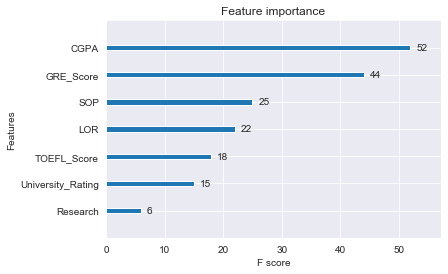

In [68]:
from xgboost import plot_importance

print(xgb_reg.best_params_)

plot_importance(xgb_reg.best_estimator_)

In [69]:
scores = xgb_reg.score(X_train,Y_train)
print('R2 score for 5-fold cross validation on training set with hyperparam optimization is: %.2f' % scores)

scores = xgb_reg.score(X_test,Y_test)
print('R2 score on test data is: %.2f' % scores)

R2 score for 5-fold cross validation on training set with hyperparam optimization is: 0.86
R2 score on test data is: 0.79


<h4><center>____Evaluating Regressor Results____</center></h4>

Based on the results on training and validation data, CatBoost and Greadient Boosting provide the best results. 
We were able to increase the performance of other training models such as RandomForest, Decision Tree, SVR and XGBRegeressor by tuning hypere parameters. 


<h4><center>____Another Approach____</center></h4>

After using regression models on this dataset, we thought of other ways to approach this problem. We took a step back and revisited the problem statement. We both have had experiences for applying to graduate schools. And for us, we were not interested in the exact % of admission chance. We were more curious about whether or not we have high or low chances in being admitted. That being said, we tried to map the Chance_of_Admit variable into two categories: high and low.
The rest of this work is focused on building classifiers to predict whether or not the chances for being admitted to a graduate school is high or low based on the provided independednt variables. 

#### Chance of Admit <=0.5 Low; Chance of Admit >0.5 High

# Classification

In [72]:
X = admission_ds_raw_v1_df[['GRE_Score', 'TOEFL_Score', 'CGPA', 'University_Rating','SOP', 'LOR', 'Research']]
Y = admission_ds_raw_v1_df.Chance_of_Admit.apply(lambda x: 1 if x > 0.5 else 0)

#### Logistic Regression
Linear relationship in data suggests Logistic Regression may yield better results

0.93
Confusion matrix
[[ 2  6]
 [ 1 91]]


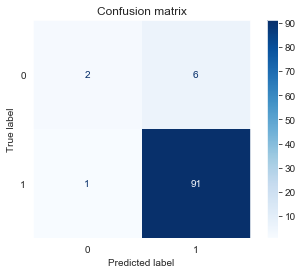

In [83]:
from sklearn.linear_model import LogisticRegression

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

estimators = []
estimators.append(('minmax', MinMaxScaler(feature_range = (0,1))))
estimators.append(('lr', LogisticRegression()))

clf = Pipeline(estimators)
clf.fit(X_train, Y_train)
print(clf.score(X_test, Y_test))

class_names = [0, 1]

# Plot non-normalized confusion matrix
title = "Confusion matrix"

disp = plot_confusion_matrix(clf, X_test, Y_test,
                             display_labels=class_names,
                             cmap=plt.cm.Blues)
disp.ax_.set_title(title)

print(title)
print(disp.confusion_matrix)

plt.grid(b=None)
plt.show()

<h4>Let's Try with Cross Validation</h4>

In [76]:
from sklearn.model_selection import StratifiedKFold

seed = 2
kfold = StratifiedKFold(n_splits=10, random_state=seed, shuffle=True)
results = cross_val_score(clf, X, Y, cv=kfold)
print(results.mean())

0.9319999999999998


### Random Forest Classifier

0.93
Confusion matrix
[[ 2  6]
 [ 1 91]]


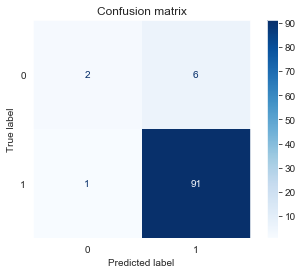

In [85]:
from sklearn.ensemble import RandomForestClassifier

estimators = []
estimators.append(('minmax', MinMaxScaler(feature_range = (0,1))))
estimators.append(('rfc', RandomForestClassifier()))

clf = Pipeline(estimators)
clf.fit(X_train, Y_train)
print(clf.score(X_test, Y_test))

class_names = [0, 1]

# Plot non-normalized confusion matrix
title = "Confusion matrix"

disp = plot_confusion_matrix(clf, X_test, Y_test,
                             display_labels=class_names,
                             cmap=plt.cm.Blues)
disp.ax_.set_title(title)

print(title)
print(disp.confusion_matrix)

plt.grid(b=None)
plt.show()

In [78]:
seed = 7
kfold = StratifiedKFold(n_splits=10, random_state=seed, shuffle=True)
results = cross_val_score(clf, X, Y, cv=kfold)
print(results.mean())

0.9279999999999999


# Classifier with multiple classes¶

Median is 0.72


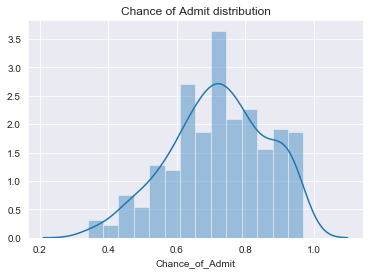

In [86]:
sns.distplot(admission_ds_raw_v1_df['Chance_of_Admit']).set_title('Chance of Admit distribution')
print("Median is %.2f" % np.percentile(admission_ds_raw_v1_df['Chance_of_Admit'].values, 50))

In [87]:
X = admission_ds_raw_v1_df[['GRE_Score', 'TOEFL_Score', 'CGPA', 'University_Rating','SOP', 'LOR', 'Research']]
Y = admission_ds_raw_v1_df.Chance_of_Admit.apply(lambda x: 2 if x > 0.75 else 1 if x > 0.5 else 0)

# Logistic Regression


0.79
Confusion matrix
[[ 0  9  0]
 [ 0 49  3]
 [ 0  9 30]]


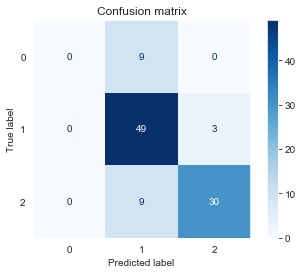

In [89]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=3)

estimators = []
estimators.append(('minmax', MinMaxScaler(feature_range = (0,1))))
estimators.append(('lr', LogisticRegression(multi_class='multinomial')))

clf = Pipeline(estimators)
clf.fit(X_train, Y_train)
print(clf.score(X_test, Y_test))

class_names = [0, 1, 2]

# Plot non-normalized confusion matrix
title = "Confusion matrix"

disp = plot_confusion_matrix(clf, X_test, Y_test,
                             display_labels=class_names,
                             cmap=plt.cm.Blues)
disp.ax_.set_title(title)

print(title)
print(disp.confusion_matrix)

plt.grid(b=None)
plt.show()

In [90]:
from sklearn.model_selection import cross_validate

seed = 3
kfold = StratifiedKFold(n_splits=5, random_state=seed, shuffle=True)
results = cross_validate(clf, X, Y, cv=kfold, scoring=['accuracy', 'f1_weighted'])
print(results['test_accuracy'].mean(), results['test_f1_weighted'].mean())

0.808 0.7807000142216426


# Random Forest Classifier


0.85
Confusion matrix
[[ 5  4  0]
 [ 3 47  2]
 [ 0  6 33]]


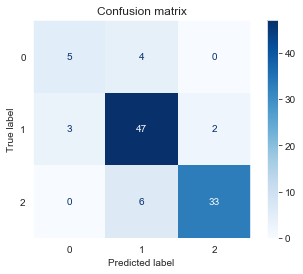

In [91]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=3)

estimators = []
estimators.append(('minmax', MinMaxScaler(feature_range = (0,1))))
estimators.append(('rfc', RandomForestClassifier()))

clf = Pipeline(estimators)
clf.fit(X_train, Y_train)
print(clf.score(X_test, Y_test))

class_names = [0, 1, 2]

# Plot non-normalized confusion matrix
title = "Confusion matrix"

disp = plot_confusion_matrix(clf, X_test, Y_test,
                             display_labels=class_names,
                             cmap=plt.cm.Blues)
disp.ax_.set_title(title)

print(title)
print(disp.confusion_matrix)

plt.grid(b=None)
plt.show()

In [92]:
seed = 5
kfold = StratifiedKFold(n_splits=5, random_state=seed, shuffle=True)
results = cross_validate(clf, X, Y, cv=kfold, scoring=['accuracy', 'f1_weighted'])
print(results['test_accuracy'].mean(), results['test_f1_weighted'].mean())

0.8200000000000001 0.8103762232075857


As can be seen, random forest classifier has better f1 score than logistic regression in case of multi-class classification.

<h4>Final thoughts</h4>

It seems that when we transform the problem statment, we can achieve high accuracies with putting less effort on fine tuning hyper parameters. That being said, we recommend this approach for the times when faster and quicker models are required to be developled. However, the information is being traded with speed. 